# Exploratory Data Analysis (EDA)
- Plot all
- Analyse numerical
- Analyse categorical
- Temporal analysis

In [3]:
import numpy as np
import pandas as pd

## Load data

In [4]:
plant = pd.read_csv('../Data/clean/plantanet_internet_gdp.csv', sep=',')
display(plant.shape)
display(plant.columns)
plant.head()

(150000, 18)

Index(['occurrenceid', 'class', 'order', 'family', 'genus', 'species',
       'scientificname', 'countrycode', 'decimallatitude', 'decimallongitude',
       'eventdate', 'day', 'month', 'year', 'country', 'incomeperperson',
       'internetuserate', 'urbanrate'],
      dtype='object')

,occurrenceid,class,order,family,genus,species,scientificname,countrycode,decimallatitude,decimallongitude,eventdate,day,month,year,country,incomeperperson,internetuserate,urbanrate
0,q-10050789731,Magnoliopsida,Lamiales,Plantaginaceae,Cymbalaria,Cymbalaria muralis,"Cymbalaria muralis P.Gaertn., B.Mey. & Scherb.",ES,39.737365,-0.828874,2016-05-28 11:32:01.482,28,5,2016,Spain,15461.75837,65.808554,77.12
1,q-10103707122,Magnoliopsida,Sapindales,Anacardiaceae,Pistacia,Pistacia lentiscus,Pistacia lentiscus L.,FR,43.068620,5.817762,2019-08-18 12:02:28.413,18,8,2019,France,22878.46657,77.498619,77.36
2,q-10593121245,Liliopsida,Asparagales,Orchidaceae,Anacamptis,Anacamptis pyramidalis,Anacamptis pyramidalis (L.) Rich.,FR,45.852500,-0.155000,2022-05-20 21:10:09.158,20,5,2022,France,22878.46657,77.498619,77.36
3,q-10067365606,Magnoliopsida,Boraginales,Boraginaceae,Cynoglossum,Cynoglossum creticum,Cynoglossum creticum Mill.,FR,43.151389,5.736667,2019-04-14 10:50:38.537,14,4,2019,France,22878.46657,77.498619,77.36
4,q-10536959012,Magnoliopsida,Lamiales,Orobanchaceae,Lathraea,Lathraea squamaria,Lathraea squamaria L.,DE,48.079440,7.587583,2022-03-14 14:36:23.989,14,3,2022,Germany,25306.18719,82.526898,73.64


In [3]:
plant.isnull().sum()/len(plant) # double-check that there are no missing values

occurrenceid        0.0
class               0.0
order               0.0
family              0.0
genus               0.0
species             0.0
scientificname      0.0
countrycode         0.0
decimallatitude     0.0
decimallongitude    0.0
eventdate           0.0
day                 0.0
month               0.0
year                0.0
country             0.0
incomeperperson     0.0
internetuserate     0.0
urbanrate           0.0
dtype: float64

## Split numerical-categorial

In [5]:
def var_types_split (df):
    numerical = df.select_dtypes(np.number)
    categorical = df.select_dtypes('object')
    return numerical, categorical

numerical_df, categorical_df = var_types_split(plant)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Numerical

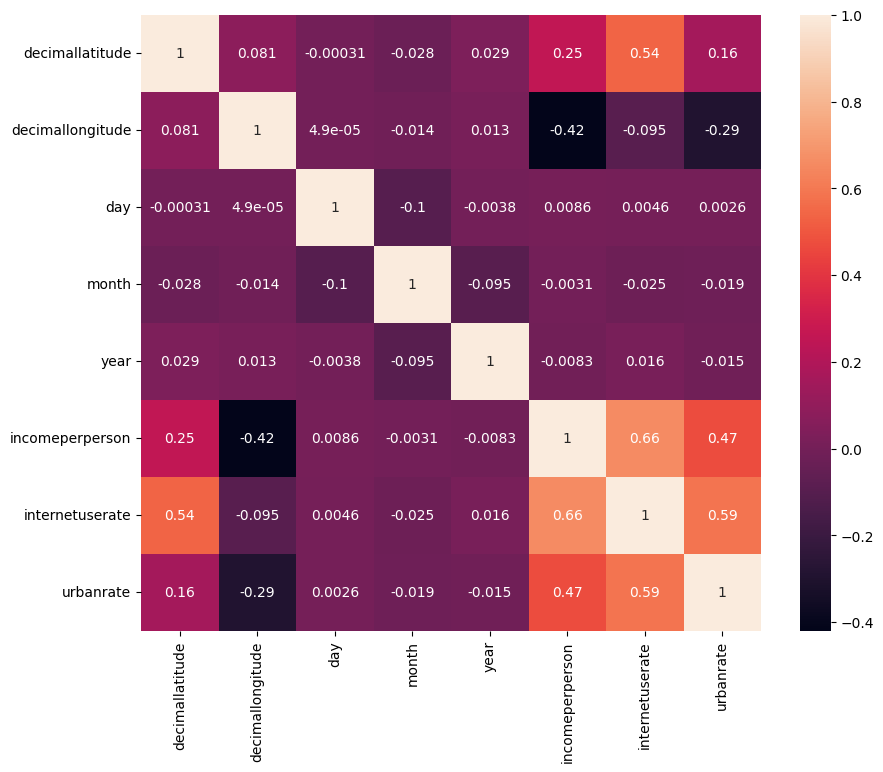

In [7]:
# Correlation matrix
corr_matrix=numerical_df.corr() # default: Pearson
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

Discrete-continuous

In [8]:
def numerical_split(df, cat=36):
    num_continuous_df = pd.DataFrame()
    num_discrete_df = pd.DataFrame()

    for col in df.columns:
        if df[col].nunique() > cat:
            num_continuous_df[col] = df[col]

        else:
            num_discrete_df[col] = df[col]

    return num_continuous_df, num_discrete_df

continuous_df, discrete_df = numerical_split(numerical_df)

### Plot

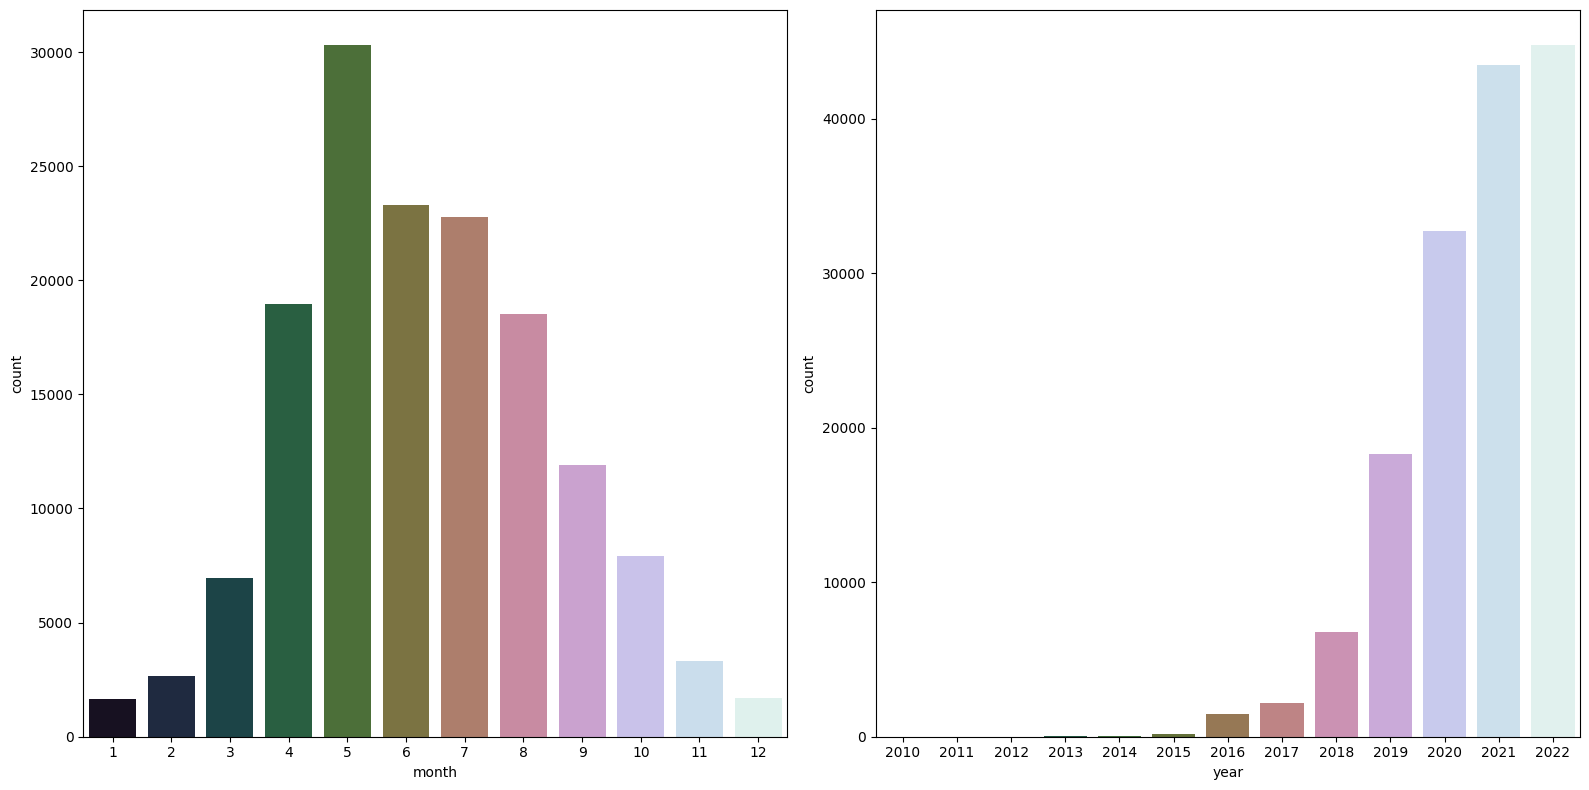

In [12]:
# countplot for descrete variables
def plot_discrete2(df):
    plt.figure(figsize=(16, 8))
    num_plots = len(df.columns)
    for i, col in enumerate(df.columns):
        plt.subplot((num_plots+1)//2, 2, i+1)
        sns.countplot(x=col, data=df, palette = "cubehelix")
    plt.tight_layout()
    plt.show()

plot_discrete2(discrete_df[['month', 'year']])    

In [ ]:
# histograms for continuous variables
def plot_continuous(df):
    plt.figure(figsize=(16, 16))
    num_plots = len(df.columns)
    for i, col in enumerate(df.columns):
        plt.subplot((num_plots+1)//2, 2, i+1)
        sns.histplot(x=col, data=df, bins=150)
    plt.tight_layout()
    plt.show()

plot_continuous(continuous_df[[]])    

Outliers in numerical continuous variables

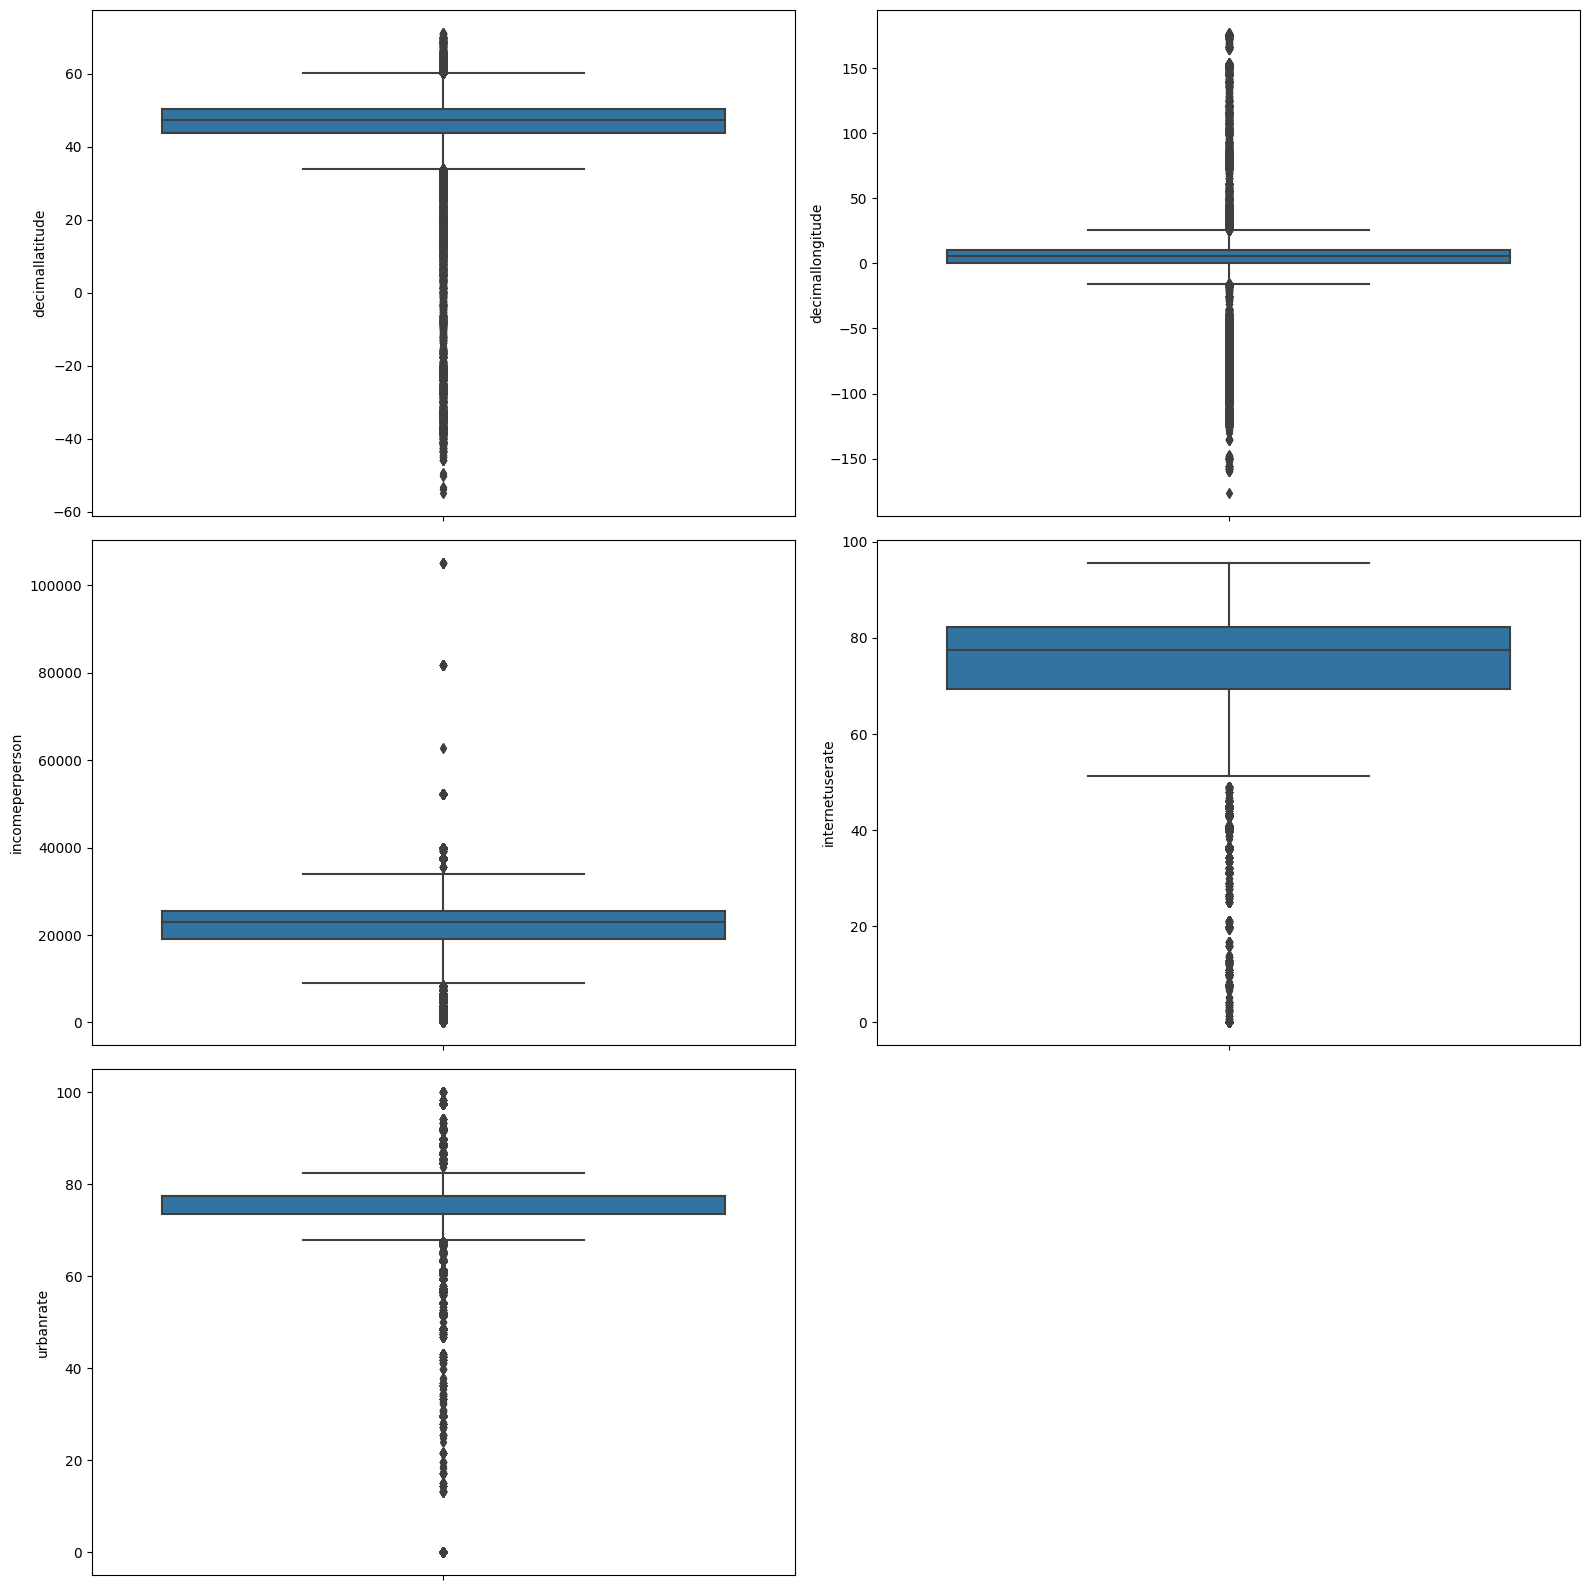

In [13]:
def boxplot_continuous(df):
    plt.figure(figsize=(16, 16))
    num_plots = len(df.columns)
    for i, col in enumerate(df.columns):
        plt.subplot((num_plots+1)//2, 2, i+1)
        sns.boxplot(y=col, data=df)
    plt.tight_layout()
    plt.show()

boxplot_continuous(continuous_df)    

## Categorical

### Plots

In [ ]:
def plot_categorical(df, cat=6):
    plt.figure(figsize=(16, 24))
    num_plots = len(df.columns)
    for i, col in enumerate(df.columns):
        plt.subplot((num_plots+1)//2, 2, i+1)
        if df[col].nunique() < cat:
            sns.countplot(x=col, data=df, order=list(df[col].value_counts().index), palette="cubehelix")
        else:
            sns.countplot(y=col, data=df, order=list(df[col].value_counts().index), palette="cubehelix")   
    plt.tight_layout()
    plt.show()

plot_categorical(categorical_df)    

## Temporal analysis

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(x= 'effective_to_date', y='total_claim_amount', data=customer_df, ci=None)

plt.xticks(rotation=20)
plt.show()